In [1]:


import numpy as np 
import pandas as pd 





In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # easier to use this method than to split the dataset manually
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


C:\Users\vanda\AppData\Local\Temp\ipykernel_756\1243383249.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['ham', 'spam'])


[Text(0, 0, '4360'), Text(0, 0, '1368')]

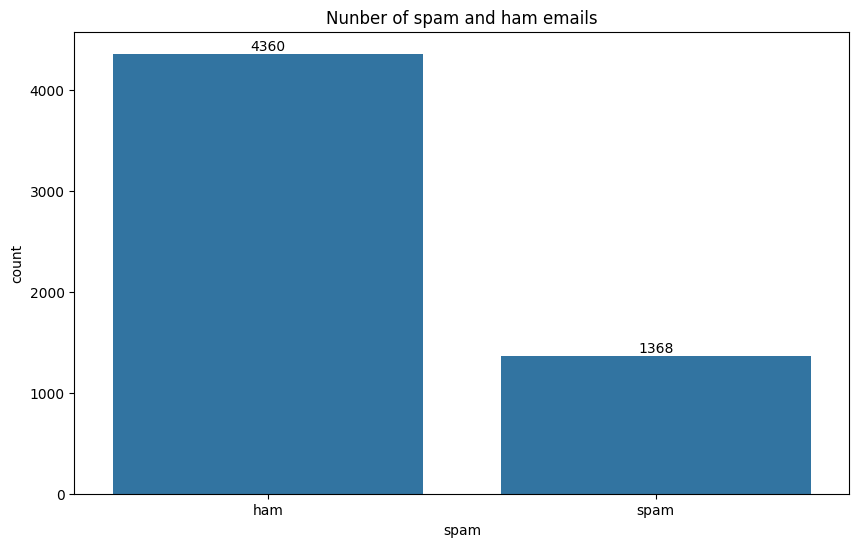

In [5]:
fig = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='spam', data=df)
ax.set_title('Nunber of spam and ham emails')
ax.set_xticklabels(['ham', 'spam'])
ax.bar_label(ax.containers[0])


In [6]:
df['words'] = df['text'].apply(lambda text: list(set(text.lower().split())))
df.head()

,text,spam,words
0,Subject: naturally irresistible your corporate...,1,"[logo, satisfaction, ciear, provided, t, our, ..."
1,Subject: the stock trading gunslinger fanny i...,1,"[attire, segovia, attainder, libretto, gunslin..."
2,Subject: unbelievable new homes made easy im ...,1,"[homeowner, of, approved, 169, easy, website, ..."
3,Subject: 4 color printing special request add...,1,"[phone, solicitation, of, special, additional,..."
4,"Subject: do not have money , get software cds ...",1,"[comedies, cds, do, with, t, not, marriage, be..."


In [7]:
df['spam_worded'] = df['spam'].apply(lambda x: 'spam' if x == 1 else 'ham')
df.head()

,text,spam,words,spam_worded
0,Subject: naturally irresistible your corporate...,1,"[logo, satisfaction, ciear, provided, t, our, ...",spam
1,Subject: the stock trading gunslinger fanny i...,1,"[attire, segovia, attainder, libretto, gunslin...",spam
2,Subject: unbelievable new homes made easy im ...,1,"[homeowner, of, approved, 169, easy, website, ...",spam
3,Subject: 4 color printing special request add...,1,"[phone, solicitation, of, special, additional,...",spam
4,"Subject: do not have money , get software cds ...",1,"[comedies, cds, do, with, t, not, marriage, be...",spam


In [8]:
word_frequency = {}

for ind in df.index:
    for word in df['words'][ind]:
        if word not in word_frequency:
#             word_frequency[word] = {'spam': 0, 'ham': 0}
            word_frequency[word] = {'spam': 1, 'ham': 1} # You can start with one of each to prevent division by 0 later on.
        word_frequency[word][df['spam_worded'][ind]] +=1
        
dict(list(word_frequency.items())[:5])

{'logo': {'spam': 97, 'ham': 13},
 'satisfaction': {'spam': 63, 'ham': 7},
 'ciear': {'spam': 10, 'ham': 1},
 'provided': {'spam': 109, 'ham': 113},
 't': {'spam': 334, 'ham': 748}}

In [9]:
Pspam = df[df['spam'] == 1].shape[0] / df.shape[0]
Pham = df[df['spam'] == 0].shape[0] / df.shape[0]
NbSpam = df[df['spam'] == 1].shape[0]
NbHam = df[df['spam'] == 0].shape[0]

In [10]:
def predict(email):
    words = set(email.lower().split())
    PxSpam = 1.0
    PxHam = 1.0
    for word in words:
        if word in word_frequency:

            PxSpam *= word_frequency[word]['spam'] / NbSpam

            PxHam *= word_frequency[word]['ham'] / NbHam

    Px = Pspam * PxSpam + Pham * PxHam

    P_Spam_x = Pspam * PxSpam / Px
    
    return print(f'The email \"{email}\" has a {round(P_Spam_x*100, 3)}% chance of being spam.')

In [11]:
X = df.drop(['spam'], axis=1)
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
train_word_frequency = {}
for ind in X_train.index:
    for word in X_train['words'][ind]:
        if word not in train_word_frequency:
            train_word_frequency[word] = {'spam': 1, 'ham': 1}
        train_word_frequency[word][X_train['spam_worded'][ind]] +=1
        

train_Pspam = y_train.value_counts()[1] / y_train.shape[0]
train_Pham = y_train.value_counts()[0] / y_train.shape[0]
train_NbSpam = y_train.value_counts()[1] 
train_NbHam = y_train.value_counts()[0]

def predict_2(words):
    PxSpam = 1.0
    PxHam = 1.0
    for word in words:
        if word in train_word_frequency:
            
            PxSpam *= train_word_frequency[word]['spam'] / train_NbSpam
            
            PxHam *= train_word_frequency[word]['ham'] / train_NbHam
            
   
    Px = train_Pspam * PxSpam + train_Pham * PxHam    
    
    
    P_Spam_x = train_Pspam * PxSpam / Px
    
    return 1 if P_Spam_x > 0.5 else 0

y_pred = X_test['words'].apply(predict_2)

C:\Users\vanda\AppData\Local\Temp\ipykernel_756\1909132258.py:30: RuntimeWarning: invalid value encountered in scalar divide
  P_Spam_x = train_Pspam * PxSpam / Px


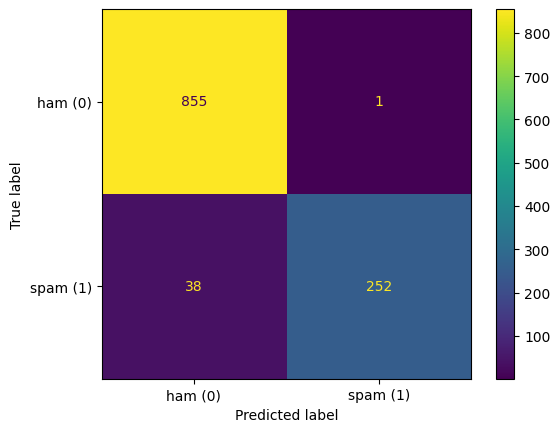

              precision    recall  f1-score   support

     ham (0)       0.96      1.00      0.98       856
    spam (1)       1.00      0.87      0.93       290

    accuracy                           0.97      1146
   macro avg       0.98      0.93      0.95      1146
weighted avg       0.97      0.97      0.97      1146



In [13]:
cm = confusion_matrix(y_test, y_pred)
cmplot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['ham (0)', 'spam (1)'])
cmplot.plot()
plt.show()

print(classification_report(y_test, y_pred, target_names = ['ham (0)', 'spam (1)']))